In [ ]:
import numpy as np
from scipy.integrate import cumulative_trapezoid
import matplotlib.pyplot as plt 
from scipy.integrate import fixed_quad

In [63]:
Vm = 20.0      # Amplitude da tensão (V)
Vd = 0.7       # Queda de tensão direta do diodo (V)
R = 100.0      # Resistência da carga (Ohm)
rd = 5.0       # Resistência dinâmica do diodo (Ohm)
alpha = 1.0    # Fator de não linearidade

theta_c = np.arcsin(Vd / Vm)

Text(0, 0.5, '$i(t)$')

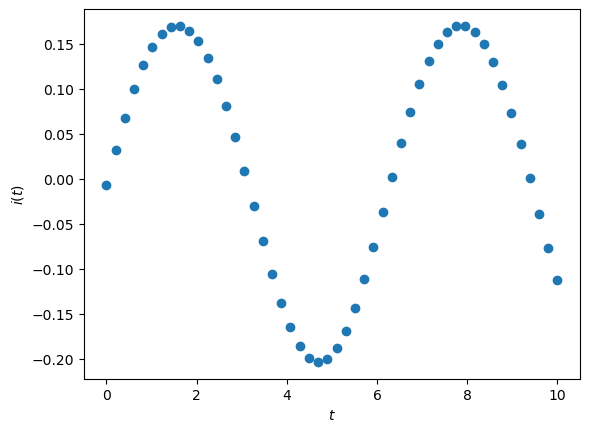

In [64]:
theta = np.linspace(0, 10)  # discretização do intervalo
i = lambda theta: (Vm * np.sin(theta) - Vd) / (R + rd * np.exp(alpha * np.sin(theta)))

plt.plot(theta,i(theta),'o')
plt.xlabel('$t$')
plt.ylabel('$i(t)$')

In [65]:
y = i(theta)
T = cumulative_trapezoid(y, theta, initial=0)[-1] # pega último valor, já que é cumulativa

print(f'Integral por Trapézio = {T:g}')

Integral por Trapézio = 0.231057


In [ ]:

def i_func(theta):
    return np.where(theta >= theta_c, 
                    (Vm * np.sin(theta) - Vd) / (R + rd * np.exp(alpha * np.sin(theta))), 
                    0)

I_gauss_total = fixed_quad(i_func, theta[0], theta[-1], n=100)[0] 

print(f'Integral por Quadratura Gaussiana: {I_gauss_total:g}')


Integral por Quadratura Gaussiana: 0.232408
